# Sentiment Analysis by Language

We can look at the sentiment analysis of the questions and answers for each language, which may indicate which languages are generally better liked by users. 

In [1]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# load datasets
a = pd.read_csv('https://media.githubusercontent.com/media/sewoller/474Project/main/Answers_Processed.csv', low_memory=False)
q = pd.read_csv('https://media.githubusercontent.com/media/sewoller/474Project/main/Questions_Processed.csv', low_memory=False)

Questions: Title Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

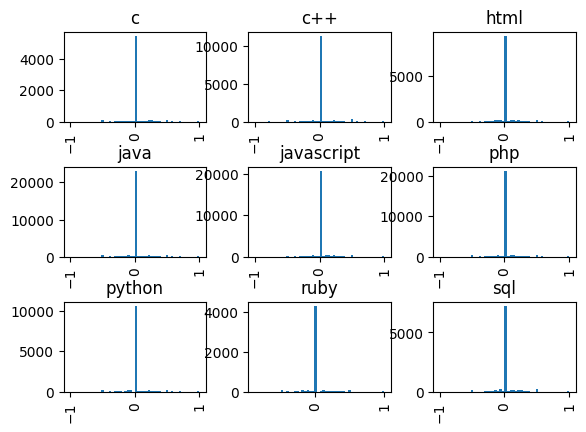

In [2]:
print("Questions: Title Sentiment by Language")
q["title_sentiment"].hist(by=q["Tag"], bins = 50)

Questions: Body Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

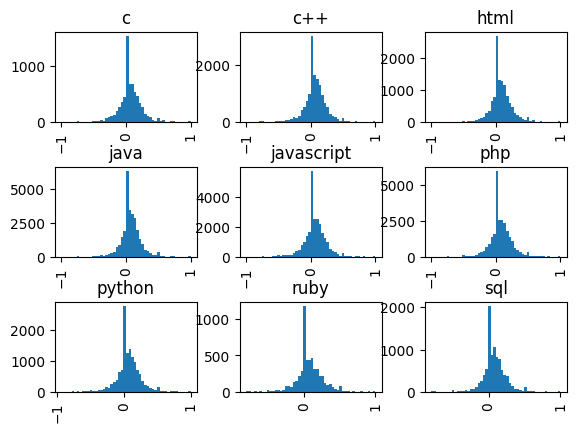

In [3]:
print("Questions: Body Sentiment by Language")
q["body_sentiment"].hist(by=q["Tag"], bins = 50)

Answers: Body Sentiment by Language


array([[<Axes: title={'center': 'c'}>, <Axes: title={'center': 'c++'}>,
        <Axes: title={'center': 'html'}>],
       [<Axes: title={'center': 'java'}>,
        <Axes: title={'center': 'javascript'}>,
        <Axes: title={'center': 'php'}>],
       [<Axes: title={'center': 'python'}>,
        <Axes: title={'center': 'ruby'}>,
        <Axes: title={'center': 'sql'}>]], dtype=object)

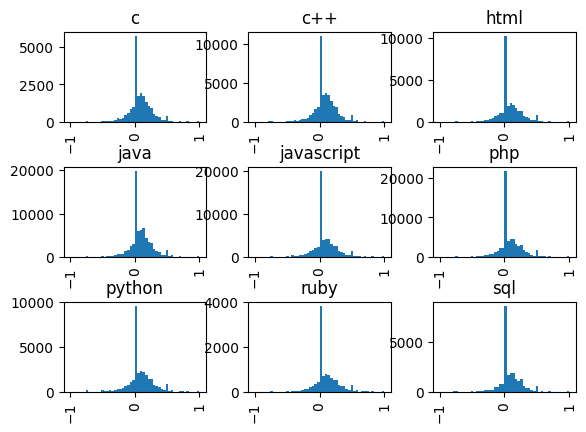

In [4]:
print("Answers: Body Sentiment by Language")
a["body_sentiment"].hist(by=a["Tag"], bins = 50)

We can see from the distribution of the sentiment analysis that the titles are almost entirely neutral. The sentiment of the body of the questions has a normal distribution for all the languages, with the vast majority of cases at or close to zero. There are slightly more cases above zero, so these would be categorized as 'neutral, leaning towards positive'. The sentiment distribution of the answers is similar; the vast majority are zero, with the rest following a normal distribution centered slightly above zero. This implies that the majority of answers can also be categorized as 'neutral' or 'neutral, leaning towards positive'. There are no great differences in the distribution of sentiment analysis between any of these languages. 

# Sentiment Analysis and Score

It may be interesting to see if the sentiment of a question has any correlation with its score. We will plot the data below. 

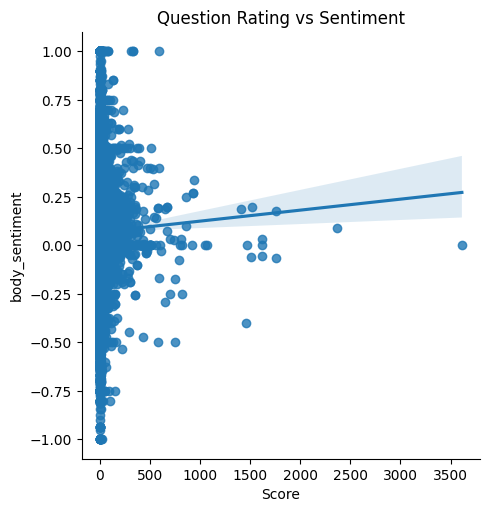

In [5]:
import seaborn as sns

sns.lmplot(x='Score', y='body_sentiment', data=q)
plt.title('Question Rating vs Sentiment')
plt.show()

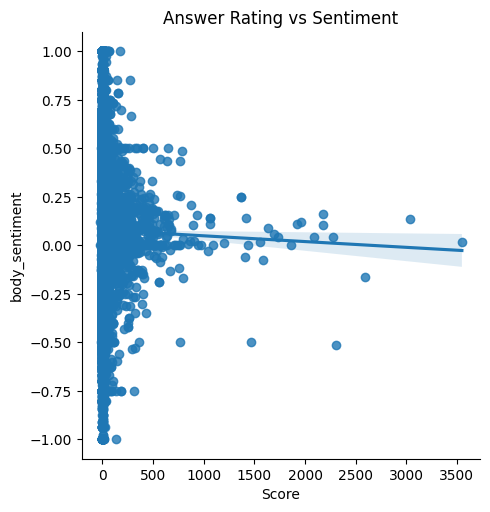

In [6]:
sns.lmplot(x='Score', y='body_sentiment', data=a)
plt.title('Answer Rating vs Sentiment')
plt.show()

What we can see from these plots is the vast majority of scores is between zero and 500, and most questions and answers follow a normal distribution of sentiment centered at zero. Higher scored posts tend to have a sentiment near zero, with a few outliers on both plots. 

# Multiclass Classification
We will now use a mutinomial classifier to test if the language of a question can be predicted by the other informaiton we have about it (score, sentiment analysis). It is highly unlikely that the predictor will have good accuracy, as we haven't seen any correlation between these elements and the language being used. 

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X = q[['Score', 'body_sentiment']]
y = q[['Tag']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# y_train.head(30)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [23]:
#sgd_clf.predict([X_test[0]])

svm_clf.classes_

array(['c', 'c++', 'html', 'java', 'javascript', 'php', 'python', 'ruby',
       'sql'], dtype=object)

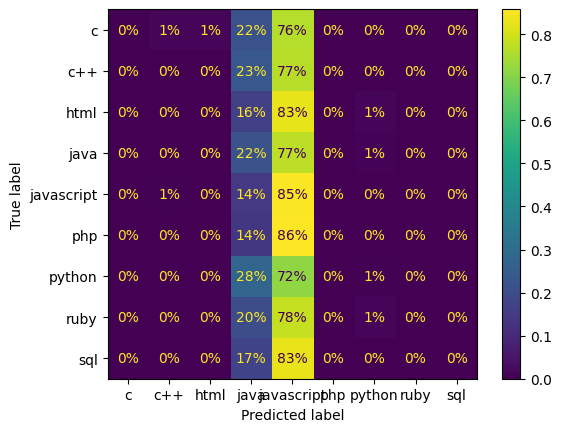

In [29]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X_train[:2000], y_train[:2000], cv=3)
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred,normalize="true",values_format=".0%")
plt.show()

In [31]:
y_train.value_counts()

Tag       
java          22561
php           21044
javascript    20465
c++           11396
python        10460
html           9493
sql            7544
c              5462
ruby           4268
Name: count, dtype: int64

## Results:
As expected, this classifier sucks. For some reason, it has a tendency to predict javascript for most values. Our guess, as we don't have the time to investigate, is that javascript has the highest correlation between score and sentiment, so it becomes the predicted class for most test values. We checked the distribution of tags in the training set, and there wasn't a hige imbalance of languages, so that wasn't the cause of the inaccuracy. 